## Pyber Ride Sharing 
### Melvin Garcia

In [261]:
# Import Dependencies
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [262]:
# Read in files using pandas

csv_path_city = os.path.join('raw_data', 'city_data.csv')
csv_path_ride = os.path.join('raw_data', 'ride_data.csv')

city_df = pd.read_csv(csv_path_city)
ride_df = pd.read_csv(csv_path_ride)

# Drop duplicates
city_df = city_df.drop_duplicates('city', keep='first')

# Merge city and ride df on 'city' column
city_ride_df = ride_df.merge(city_df, on = 'city')

In [263]:
# Peek at data
city_ride_df.head()

,city,date,fare,ride_id,driver_count,type
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038,46,Urban
1,Sarabury,2016-07-23 07:42:44,21.76,7546681945283,46,Urban
2,Sarabury,2016-04-02 04:32:25,38.03,4932495851866,46,Urban
3,Sarabury,2016-06-23 05:03:41,26.82,6711035373406,46,Urban
4,Sarabury,2016-09-30 12:48:34,30.30,6388737278232,46,Urban


In [264]:
# Set variables for bubble plot

avg_fare_by_city = city_ride_df.groupby('city').mean()['fare']

ride_count_by_city =  city_ride_df.groupby('city')['ride_id'].count()

driver_count_by_city = city_ride_df.groupby('city').mean()['driver_count']

city_type = city_df.set_index('city')['type']

city_summary = pd.DataFrame({'Total Number of Rides':ride_count_by_city,
                            'Total Number of Drivers':driver_count_by_city,
                            'Average Fare ($) Per City':avg_fare_by_city,
                            'City Type':city_type})



In [265]:
# Peek at city_summary

city_summary.head()

,Average Fare ($) Per City,City Type,Total Number of Drivers,Total Number of Rides
Alvarezhaven,23.928710,Urban,21.0,31
Alyssaberg,20.609615,Urban,67.0,26
Anitamouth,37.315556,Suburban,16.0,9
Antoniomouth,23.625000,Urban,21.0,22
Aprilchester,21.981579,Urban,49.0,19


In [266]:
# Categorize by city type
urban_df = city_summary.loc[city_summary['City Type'] == 'Urban']
suburban_df = city_summary.loc[city_summary['City Type'] == 'Suburban']
rural_df = city_summary.loc[city_summary['City Type'] == 'Rural']

urban_df.head()

,Average Fare ($) Per City,City Type,Total Number of Drivers,Total Number of Rides
Alvarezhaven,23.928710,Urban,21.0,31
Alyssaberg,20.609615,Urban,67.0,26
Antoniomouth,23.625000,Urban,21.0,22
Aprilchester,21.981579,Urban,49.0,19
Arnoldview,25.106452,Urban,41.0,31


In [267]:
# Assign colors per city type
colors = {'Urban': 'lightcoral', 'Suburban': 'skyblue', 'Rural': 'gold'}

city_colors = {'Urban': colors['Urban'], 'Suburban': colors['Suburban'], 'Rural': colors['Rural']}

## Bubble Plot of Ride Sharing Data

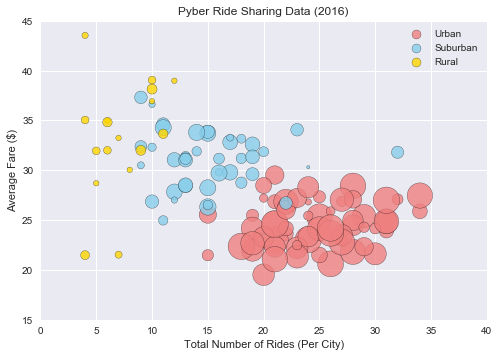

In [268]:
# Create scatter plot for each city type

plt.scatter(urban_df['Total Number of Rides'], 
            urban_df['Average Fare ($) Per City'], s = urban_df['Total Number of Drivers']*10, 
            color = city_colors['Urban'], edgecolor = 'black', label = 'Urban', alpha = 0.8)

plt.scatter(suburban_df['Total Number of Rides'], 
            suburban_df['Average Fare ($) Per City'], 
            s = suburban_df['Total Number of Drivers']*10, 
            color = city_colors['Suburban'], edgecolor = 'black', label = 'Suburban', alpha = 0.8)

plt.scatter(rural_df['Total Number of Rides'], 
            rural_df['Average Fare ($) Per City'], s = rural_df['Total Number of Drivers']*10, 
            color = city_colors['Rural'], edgecolor = 'black', label = 'Rural', alpha = 0.8)

plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')
plt.title('Pyber Ride Sharing Data (2016)')

plt.xlim([0, 40])
plt.ylim([15, 45])
plt.yticks(np.arange(15, 50, 5))
plt.xticks(np.arange(0, 45, 5))

lgnd = plt.legend()
lgnd.legendHandles[0]._sizes = [80]
lgnd.legendHandles[1]._sizes = [80]
lgnd.legendHandles[2]._sizes = [80]

plt.show()

## Total Fares by City Type

In [269]:
type_fare_sum = city_ride_df.groupby('type')['fare'].sum().sort_values(ascending=False)


In [270]:
list(type_fare_sum)

[40078.339999999967, 19317.880000000008, 4255.090000000002]

In [271]:
# Labels for the sections of our pie chart for all pie charts
labels = ['Urban', 'Suburban', 'Rural']

# The colors of each section of the pie chart for all pie charts
colors = ["lightcoral", "skyblue", "gold"]

In [272]:
# Labels for the sections of our pie chart
labels = ['Urban', 'Suburban', 'Rural']

# The values of each section of the pie chart
type_vals = list(type_fare_sum)

# Tells matplotlib to separate the "Python" section
# from the others
explode = [0.1, 0, 0]

plt.axis("equal")

(-0.055000000000000007,
 0.055000000000000007,
 -0.055000000000000007,
 0.055000000000000007)

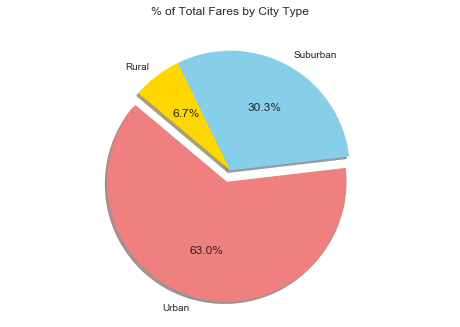

In [273]:
# Creates the pie chart based upon the values above

plt.pie(type_vals, labels=labels, colors=colors, explode=explode,
        autopct="{0:1.1f}%".format, shadow=True, startangle=140)

plt.title('% of Total Fares by City Type')

plt.show()

## Total Rides by City Type

In [274]:
type_ride_count = city_ride_df.groupby('type')['ride_id'].count().sort_values(ascending=False)

In [275]:
list(type_ride_count)

[1625, 625, 125]

In [276]:
# The values of each section of the pie chart
type_vals = list(type_ride_sum)

# Tells matplotlib to separate the "Python" section
# from the others
explode = [0.1, 0, 0]

plt.axis("equal")

(-0.055000000000000007,
 0.055000000000000007,
 -0.055000000000000007,
 0.055000000000000007)

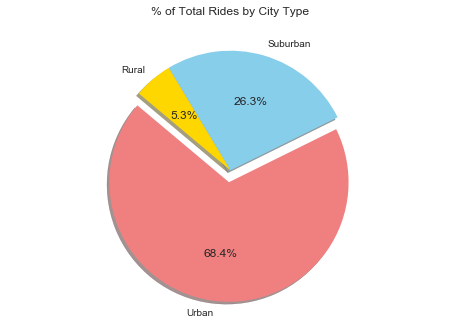

In [277]:
# Creates the pie chart based upon the values above

plt.pie(type_vals, labels=labels, colors=colors, explode=explode,
        autopct="{0:1.1f}%".format, shadow=True, startangle=140)

plt.title('% of Total Rides by City Type')

plt.show()

## Total Drivers by City Type

In [278]:
type_drivers_sum = city_ride_df.groupby('type')['driver_count'].sum().sort_values(ascending=False)


In [279]:
list(type_drivers_sum)

[64501, 9634, 727]

In [280]:
# The values of each section of the pie chart
type_vals = list(type_drivers_sum)

# The colors of each section of the pie chart
colors = ["lightcoral", "skyblue", "gold"]

# Tells matplotlib to separate the "Python" section
# from the others
explode = [0.1, 0, 0]

plt.axis("equal")

(-0.055000000000000007,
 0.055000000000000007,
 -0.055000000000000007,
 0.055000000000000007)

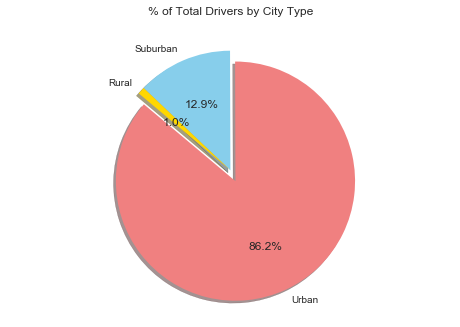

In [281]:
# Creates the pie chart based upon the values above

plt.pie(type_vals, labels=labels, colors=colors, explode=explode,
        autopct="{0:1.1f}%".format, shadow=True, startangle=140)

plt.title('% of Total Drivers by City Type')

plt.show()

## Observable Trends

### - There appears to be somewhat of a negative trend with higher the total number of rides, the lower the average fare in dollars.

### - The average fare per ride is 10 dollars higher in rural areas than urban areas. This may be due to the average distance between destination points--points being farther in rural than urban areas.

### - Although labeled as part of a suburban area, the city of Port James' number of rides is comparable to the number of rides in the top 3 urban cities.